In [1]:
# CHAPTER 11 Time Series
# Timestamps
# Fixed periods
# TimeDeltas
"""
datetime stores both the date and time down to the microsecond. 
timedelta repre‐ sents the temporal difference between two datetime objects.
"""

'\ndatetime stores both the date and time down to the microsecond. \ntimedelta repre‐ sents the temporal difference between two datetime objects.\n'

In [2]:
# 11.1 Date and Time Data Types and Tools
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2019, 7, 28, 22, 22, 33, 994781)

In [3]:
now.year, now.month, now.day

(2019, 7, 26)

In [4]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(days=926, seconds=56700)

In [5]:
delta.days, delta.seconds

(926, 56700)

In [6]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [7]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

In [8]:
# Converting Between String and Datetime
stamp = datetime(2011, 1, 3)

In [9]:
str(stamp)

'2011-01-03 00:00:00'

In [10]:
stamp.strftime('%Y-%m-%d')  # f:format

'2011-01-03'

In [13]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')  # p:parsed

datetime.datetime(2011, 1, 3, 0, 0)

In [14]:
value = '11-01-03'
datetime.strptime(value, '%y-%m-%d')  # p:parsed

datetime.datetime(2011, 1, 3, 0, 0)

In [15]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [16]:
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [17]:
parse('2011/01/03')

datetime.datetime(2011, 1, 3, 0, 0)

In [18]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [19]:
parse('01/03/2011')

datetime.datetime(2011, 1, 3, 0, 0)

In [20]:
parse('01/03/2011', dayfirst=True)

datetime.datetime(2011, 3, 1, 0, 0)

In [4]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
import pandas as pd
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [23]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [24]:
idx[2]  # NaT:Not a Time

NaT

In [25]:
pd.isnull(idx)

array([False, False,  True])

In [5]:
from datetime import datetime
import numpy as np
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -2.100626
2011-01-05    0.230007
2011-01-07    0.118115
2011-01-08    2.345818
2011-01-10   -0.630043
2011-01-12   -1.130030
dtype: float64

In [28]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [29]:
ts + ts[::2]

2011-01-02   -0.043202
2011-01-05         NaN
2011-01-07    2.817357
2011-01-08         NaN
2011-01-10    0.367360
2011-01-12         NaN
dtype: float64

In [30]:
ts[::2]

2011-01-02   -0.021601
2011-01-07    1.408678
2011-01-10    0.183680
dtype: float64

In [31]:
ts.index.dtype

dtype('<M8[ns]')

In [32]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

In [33]:
# Indexing, Selection, Subsetting
stamp = ts.index[2]
ts[stamp]

1.408678431190467

In [34]:
ts['1/07/2011']

1.408678431190467

In [35]:
ts['20110107']

1.408678431190467

In [6]:
# a string date, datetime, or timestamp
# slice is a view
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01   -0.488749
2000-01-02   -0.417847
2000-01-03    1.019878
2000-01-04    0.864170
2000-01-05   -1.752034
2000-01-06   -0.973950
2000-01-07    0.907819
2000-01-08   -2.260874
2000-01-09    0.097263
2000-01-10   -1.010739
2000-01-11    0.240211
2000-01-12    0.284281
2000-01-13    1.243277
2000-01-14    0.045811
2000-01-15    0.504568
2000-01-16    1.215706
2000-01-17    1.275598
2000-01-18    1.327617
2000-01-19    0.643226
2000-01-20   -0.294198
2000-01-21    1.635368
2000-01-22   -0.583577
2000-01-23   -1.310768
2000-01-24    1.252513
2000-01-25    0.769212
2000-01-26    0.498015
2000-01-27    0.708506
2000-01-28   -0.452871
2000-01-29    0.196322
2000-01-30    1.366182
                ...   
2002-08-28   -0.178032
2002-08-29   -0.215025
2002-08-30   -1.279068
2002-08-31    2.014083
2002-09-01   -1.346938
2002-09-02    0.390809
2002-09-03   -0.728290
2002-09-04    1.342175
2002-09-05   -0.523438
2002-09-06    0.249946
2002-09-07   -0.944438
2002-09-08    0.911815
2002-09-09 

In [7]:
longer_ts['2001']

2001-01-01    0.717527
2001-01-02    1.113710
2001-01-03   -0.032147
2001-01-04    1.053748
2001-01-05    0.393735
2001-01-06    1.483755
2001-01-07    0.192490
2001-01-08   -0.235306
2001-01-09   -0.025934
2001-01-10   -2.295553
2001-01-11    0.590926
2001-01-12   -0.395407
2001-01-13    0.658141
2001-01-14   -0.223070
2001-01-15   -0.368448
2001-01-16   -0.892862
2001-01-17   -0.273460
2001-01-18    0.249367
2001-01-19   -0.198764
2001-01-20   -1.063683
2001-01-21    0.190122
2001-01-22    0.268696
2001-01-23   -0.183083
2001-01-24    0.817114
2001-01-25    0.845838
2001-01-26    0.643062
2001-01-27    0.765970
2001-01-28    1.171750
2001-01-29    0.480367
2001-01-30    0.928168
                ...   
2001-12-02    1.738986
2001-12-03    1.018685
2001-12-04   -0.799111
2001-12-05   -0.862456
2001-12-06    0.420636
2001-12-07   -1.334870
2001-12-08    1.142454
2001-12-09   -0.083284
2001-12-10   -1.213572
2001-12-11   -0.438072
2001-12-12   -1.668207
2001-12-13   -1.039657
2001-12-14 

In [8]:
longer_ts['2001-05']

2001-05-01   -1.483877
2001-05-02    1.050808
2001-05-03   -0.166934
2001-05-04   -1.437529
2001-05-05   -1.324494
2001-05-06   -1.644476
2001-05-07    1.315254
2001-05-08    0.283704
2001-05-09    0.412818
2001-05-10    0.081347
2001-05-11   -0.121682
2001-05-12   -1.022284
2001-05-13    0.121777
2001-05-14    0.985322
2001-05-15    0.470723
2001-05-16   -1.711396
2001-05-17    0.798832
2001-05-18    1.618818
2001-05-19   -1.198858
2001-05-20    0.685864
2001-05-21   -0.527546
2001-05-22   -0.728808
2001-05-23   -1.616793
2001-05-24   -0.357497
2001-05-25    0.218773
2001-05-26    0.536624
2001-05-27   -1.004821
2001-05-28    1.170728
2001-05-29    0.903795
2001-05-30    2.280249
2001-05-31   -1.197550
Freq: D, dtype: float64

In [9]:
longer_ts['2001/05']

2001-05-01   -1.483877
2001-05-02    1.050808
2001-05-03   -0.166934
2001-05-04   -1.437529
2001-05-05   -1.324494
2001-05-06   -1.644476
2001-05-07    1.315254
2001-05-08    0.283704
2001-05-09    0.412818
2001-05-10    0.081347
2001-05-11   -0.121682
2001-05-12   -1.022284
2001-05-13    0.121777
2001-05-14    0.985322
2001-05-15    0.470723
2001-05-16   -1.711396
2001-05-17    0.798832
2001-05-18    1.618818
2001-05-19   -1.198858
2001-05-20    0.685864
2001-05-21   -0.527546
2001-05-22   -0.728808
2001-05-23   -1.616793
2001-05-24   -0.357497
2001-05-25    0.218773
2001-05-26    0.536624
2001-05-27   -1.004821
2001-05-28    1.170728
2001-05-29    0.903795
2001-05-30    2.280249
2001-05-31   -1.197550
Freq: D, dtype: float64

In [10]:
ts[datetime(2011, 1, 7):]

2011-01-07    0.076761
2011-01-08   -0.352541
2011-01-10   -1.236109
2011-01-12    1.236898
dtype: float64

In [11]:
ts['1/6/2011':'1/11/2011']

2011-01-07    0.076761
2011-01-08   -0.352541
2011-01-10   -1.236109
dtype: float64

In [12]:
ts.truncate(after='1/9/2011')

2011-01-02   -0.703243
2011-01-05   -0.820913
2011-01-07    0.076761
2011-01-08   -0.352541
dtype: float64

In [13]:
ts.truncate(before='1/9/2011')

2011-01-10   -1.236109
2011-01-12    1.236898
dtype: float64

In [17]:
dates = pd.date_range('7/1/2019', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas','New York', 'Ohio'])
long_df.loc['7-2019']


,Colorado,Texas,New York,Ohio
2019-07-03,-0.680593,-0.727511,-0.080562,1.084107
2019-07-10,-0.715190,-1.410609,-0.001066,-0.267263
2019-07-17,0.431979,0.730821,0.421394,-1.859299
2019-07-24,-1.372471,1.415960,-0.660417,-1.834353
2019-07-31,-1.040089,1.021544,0.489276,-1.445053


In [18]:
# Time Series with Duplicate Indices
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [20]:
dup_ts.is_unique

True

In [21]:
dup_ts.unique()

array([0, 1, 2, 3, 4])

In [22]:
dup_ts['1/3/2000'] # not duplicated

4

In [23]:
dup_ts['1/2/2000'] # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [25]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

In [26]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

In [27]:
# 11.3 Date Ranges, Frequencies, and Shifting
# year, month
ts

2011-01-02   -0.703243
2011-01-05   -0.820913
2011-01-07    0.076761
2011-01-08   -0.352541
2011-01-10   -1.236109
2011-01-12    1.236898
dtype: float64

In [28]:
resampler = ts.resample('D')
resampler

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

In [29]:
# Generating Date Ranges
index = pd.date_range('2012-04-01', '2012-06-01')  # both inclusive
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [30]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [31]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [33]:
pd.date_range('2019-07-01', '2019-12-01', freq='BM')

DatetimeIndex(['2019-07-31', '2019-08-30', '2019-09-30', '2019-10-31',
               '2019-11-29'],
              dtype='datetime64[ns]', freq='BM')

In [37]:
pd.date_range('2019-07-01', '2020-12-01', freq='d')

DatetimeIndex(['2019-07-01', '2019-07-02', '2019-07-03', '2019-07-04',
               '2019-07-05', '2019-07-06', '2019-07-07', '2019-07-08',
               '2019-07-09', '2019-07-10',
               ...
               '2020-11-22', '2020-11-23', '2020-11-24', '2020-11-25',
               '2020-11-26', '2020-11-27', '2020-11-28', '2020-11-29',
               '2020-11-30', '2020-12-01'],
              dtype='datetime64[ns]', length=520, freq='D')

In [38]:
pd.date_range('2012-05-02 12:56:31', periods=5)  # preserve time

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [39]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)  # drop time

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

In [41]:
# Frequencies and Date Offsets


In [42]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

In [43]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [44]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [45]:
Hour(2) + Minute(30)

<150 * Minutes>

In [46]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [48]:
# Week of month dates
rng = pd.date_range('2019-07-01', '2019-08-01', freq='WOM-3FRI')
rng

DatetimeIndex(['2019-07-19'], dtype='datetime64[ns]', freq='WOM-3FRI')

In [51]:
rng = pd.date_range('2019-07-01', '2019-08-01', freq='W-MON')
list(rng)

[Timestamp('2019-07-01 00:00:00', freq='W-MON'),
 Timestamp('2019-07-08 00:00:00', freq='W-MON'),
 Timestamp('2019-07-15 00:00:00', freq='W-MON'),
 Timestamp('2019-07-22 00:00:00', freq='W-MON'),
 Timestamp('2019-07-29 00:00:00', freq='W-MON')]

In [5]:
# Shifting (Leading and Lagging) Data
ts = pd.Series(np.random.randn(4),index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31   -0.337085
2000-02-29   -0.239073
2000-03-31    1.253427
2000-04-30    1.388311
Freq: M, dtype: float64

In [7]:
ts.shift(-2)

2000-01-31    1.253427
2000-02-29    1.388311
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [8]:
ts.shift(1)

2000-01-31         NaN
2000-02-29   -0.337085
2000-03-31   -0.239073
2000-04-30    1.253427
Freq: M, dtype: float64

In [9]:
ts / ts.shift(1) - 1  # computing percent changes in a time series or multiple time series as DataFrame columns.

2000-01-31         NaN
2000-02-29   -0.290763
2000-03-31   -6.242868
2000-04-30    0.107612
Freq: M, dtype: float64

In [11]:
(ts - ts.shift(1)) / ts.shift(1)  # computing percent changes in a time series or multiple time series as DataFrame columns.

2000-01-31         NaN
2000-02-29   -0.290763
2000-03-31   -6.242868
2000-04-30    0.107612
Freq: M, dtype: float64

In [12]:
ts.shift(2, freq='M')  # leave the index modified

2000-03-31   -0.337085
2000-04-30   -0.239073
2000-05-31    1.253427
2000-06-30    1.388311
Freq: M, dtype: float64

In [13]:
ts.shift(3, freq='D')

2000-02-03   -0.337085
2000-03-03   -0.239073
2000-04-03    1.253427
2000-05-03    1.388311
dtype: float64

In [14]:
ts.shift(1, freq='90T')  # The T here stands for minutes.

2000-01-31 01:30:00   -0.337085
2000-02-29 01:30:00   -0.239073
2000-03-31 01:30:00    1.253427
2000-04-30 01:30:00    1.388311
Freq: M, dtype: float64

In [17]:
# Shifting dates with offsets
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2019, 7, 27)
now + 3 * Day()

Timestamp('2019-07-30 00:00:00')

In [18]:
now + MonthEnd()

Timestamp('2019-07-31 00:00:00')

In [19]:
now + MonthEnd(2)

Timestamp('2019-08-31 00:00:00')

In [20]:
# rollforward() and rollback()
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2019-07-31 00:00:00')

In [21]:
offset.rollback(now)

Timestamp('2019-06-30 00:00:00')

In [23]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('7/27/2019', periods=20, freq='4d'))
ts

2019-07-27    0.811305
2019-07-31   -0.417231
2019-08-04   -0.833219
2019-08-08    0.164984
2019-08-12   -0.272656
2019-08-16    0.216261
2019-08-20    0.422358
2019-08-24   -0.479834
2019-08-28    0.044960
2019-09-01   -0.671305
2019-09-05   -0.702989
2019-09-09   -0.382805
2019-09-13    0.565095
2019-09-17   -0.613351
2019-09-21   -0.763326
2019-09-25   -0.175015
2019-09-29    1.607198
2019-10-03   -1.009553
2019-10-07    0.034176
2019-10-11    0.062099
Freq: 4D, dtype: float64

In [24]:
ts.groupby(offset.rollforward).mean() 

2019-07-31    0.197037
2019-08-31   -0.105306
2019-09-30   -0.142062
2019-10-31   -0.304426
dtype: float64

In [25]:
ts.groupby(offset.rollback).mean()

2019-06-30    0.811305
2019-07-31   -0.144297
2019-08-31   -0.142062
2019-09-30   -0.304426
dtype: float64

In [29]:
test_datatime = datetime(2019, 7, 31)
offset = MonthEnd()
print(offset.rollforward(test_datatime))
print(test_datatime + offset)
print(offset.rollback(test_datatime))
print(test_datatime - offset)

2019-07-31 00:00:00
2019-08-31 00:00:00
2019-07-31 00:00:00
2019-06-30 00:00:00


In [30]:
ts.resample('M').mean()

2019-07-31    0.197037
2019-08-31   -0.105306
2019-09-30   -0.142062
2019-10-31   -0.304426
Freq: M, dtype: float64

In [6]:
# 11.4 Time Zone Handling
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [7]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [8]:
# Time Zone Localization and Conversion
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00    0.947780
2012-03-10 09:30:00    1.244549
2012-03-11 09:30:00   -0.254703
2012-03-12 09:30:00   -0.500557
2012-03-13 09:30:00   -1.081846
2012-03-14 09:30:00   -1.213819
Freq: D, dtype: float64

In [9]:
print(ts.index.tz)

None


In [10]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [11]:
ts

2012-03-09 09:30:00    0.947780
2012-03-10 09:30:00    1.244549
2012-03-11 09:30:00   -0.254703
2012-03-12 09:30:00   -0.500557
2012-03-13 09:30:00   -1.081846
2012-03-14 09:30:00   -1.213819
Freq: D, dtype: float64

In [12]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00    0.947780
2012-03-10 09:30:00+00:00    1.244549
2012-03-11 09:30:00+00:00   -0.254703
2012-03-12 09:30:00+00:00   -0.500557
2012-03-13 09:30:00+00:00   -1.081846
2012-03-14 09:30:00+00:00   -1.213819
Freq: D, dtype: float64

In [13]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [14]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00    0.947780
2012-03-10 04:30:00-05:00    1.244549
2012-03-11 05:30:00-04:00   -0.254703
2012-03-12 05:30:00-04:00   -0.500557
2012-03-13 05:30:00-04:00   -1.081846
2012-03-14 05:30:00-04:00   -1.213819
Freq: D, dtype: float64

In [16]:
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern

2012-03-09 09:30:00-05:00    0.947780
2012-03-10 09:30:00-05:00    1.244549
2012-03-11 09:30:00-04:00   -0.254703
2012-03-12 09:30:00-04:00   -0.500557
2012-03-13 09:30:00-04:00   -1.081846
2012-03-14 09:30:00-04:00   -1.213819
Freq: D, dtype: float64

In [17]:
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00    0.947780
2012-03-10 14:30:00+00:00    1.244549
2012-03-11 13:30:00+00:00   -0.254703
2012-03-12 13:30:00+00:00   -0.500557
2012-03-13 13:30:00+00:00   -1.081846
2012-03-14 13:30:00+00:00   -1.213819
Freq: D, dtype: float64

In [18]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00    0.947780
2012-03-10 15:30:00+01:00    1.244549
2012-03-11 14:30:00+01:00   -0.254703
2012-03-12 14:30:00+01:00   -0.500557
2012-03-13 14:30:00+01:00   -1.081846
2012-03-14 14:30:00+01:00   -1.213819
Freq: D, dtype: float64

In [19]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

In [20]:
# Operations with Time Zone−Aware Timestamp Objects
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [21]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [22]:
stamp_utc.value

1299902400000000000

In [23]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

In [24]:
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [25]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [26]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [27]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

In [31]:
# stamp * 2 + Hour()  # TypeError: unsupported operand type(s) for *: 'Timestamp' and 'int'
# stamp + stamp + Hour()  # TypeError: unsupported operand type(s) for +: 'Timestamp' and 'Timestamp'

TypeError: unsupported operand type(s) for +: 'Timestamp' and 'Timestamp'

In [29]:
# Operations Between Different Time Zones
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00   -0.083640
2012-03-08 09:30:00   -0.728303
2012-03-09 09:30:00    1.151532
2012-03-12 09:30:00   -0.723122
2012-03-13 09:30:00    0.591072
2012-03-14 09:30:00   -1.435915
2012-03-15 09:30:00    1.090052
2012-03-16 09:30:00    0.392439
2012-03-19 09:30:00    0.955758
2012-03-20 09:30:00   -1.205156
Freq: B, dtype: float64

In [30]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [32]:
# 11.5 Periods and Period Arithmetic
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [33]:
p + 5

Period('2012', 'A-DEC')

In [34]:
p - 2

Period('2005', 'A-DEC')

In [35]:
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

In [38]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [39]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -0.404328
2000-02    0.258761
2000-03   -0.569020
2000-04    0.625715
2000-05   -0.936697
2000-06   -0.161379
Freq: M, dtype: float64

In [40]:
values = ['2001Q3', '2002Q2', '2003Q1']

In [42]:
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

In [43]:
# Period Frequency Conversion
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [44]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [45]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [46]:
p = pd.Period('2007', freq='A-JUN')
p

Period('2007', 'A-JUN')

In [47]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [48]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [49]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [50]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006    0.616860
2007   -0.112963
2008   -0.585288
2009   -0.776764
Freq: A-DEC, dtype: float64

In [51]:
ts.asfreq('M', how='start')

2006-01    0.616860
2007-01   -0.112963
2008-01   -0.585288
2009-01   -0.776764
Freq: M, dtype: float64

In [52]:
ts.asfreq('B', how='end')

2006-12-29    0.616860
2007-12-31   -0.112963
2008-12-31   -0.585288
2009-12-31   -0.776764
Freq: B, dtype: float64

In [54]:
# Quarterly Period Frequencies
p = pd.Period('2012Q4', freq='Q-DEC')
p

Period('2012Q4', 'Q-DEC')

In [55]:
p.asfreq('D', 'start')

Period('2012-10-01', 'D')

In [56]:
p.asfreq('D', 'end')

Period('2012-12-31', 'D')

In [57]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [58]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [59]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [60]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [61]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [62]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [63]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

In [64]:
# Converting Timestamps to Periods (and Back)
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31    1.943939
2000-02-29    0.415412
2000-03-31    0.354962
Freq: M, dtype: float64

In [66]:
pts = ts.to_period()
pts

2000-01    1.943939
2000-02    0.415412
2000-03    0.354962
Freq: M, dtype: float64

In [67]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29   -1.363374
2000-01-30    0.239907
2000-01-31   -1.197323
2000-02-01    1.606297
2000-02-02   -0.448512
2000-02-03   -0.958237
Freq: D, dtype: float64

In [68]:
ts2.to_period('M')

2000-01   -1.363374
2000-01    0.239907
2000-01   -1.197323
2000-02    1.606297
2000-02   -0.448512
2000-02   -0.958237
Freq: M, dtype: float64

In [69]:
pts = ts2.to_period()
pts

2000-01-29   -1.363374
2000-01-30    0.239907
2000-01-31   -1.197323
2000-02-01    1.606297
2000-02-02   -0.448512
2000-02-03   -0.958237
Freq: D, dtype: float64

In [70]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999   -1.363374
2000-01-30 23:59:59.999999999    0.239907
2000-01-31 23:59:59.999999999   -1.197323
2000-02-01 23:59:59.999999999    1.606297
2000-02-02 23:59:59.999999999   -0.448512
2000-02-03 23:59:59.999999999   -0.958237
Freq: D, dtype: float64

In [71]:
# Creating a PeriodIndex from Arrays
data = pd.read_csv('examples/macrodata.csv')
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [72]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
5      1960.0
6      1960.0
7      1960.0
8      1961.0
9      1961.0
10     1961.0
11     1961.0
12     1962.0
13     1962.0
14     1962.0
15     1962.0
16     1963.0
17     1963.0
18     1963.0
19     1963.0
20     1964.0
21     1964.0
22     1964.0
23     1964.0
24     1965.0
25     1965.0
26     1965.0
27     1965.0
28     1966.0
29     1966.0
        ...  
173    2002.0
174    2002.0
175    2002.0
176    2003.0
177    2003.0
178    2003.0
179    2003.0
180    2004.0
181    2004.0
182    2004.0
183    2004.0
184    2005.0
185    2005.0
186    2005.0
187    2005.0
188    2006.0
189    2006.0
190    2006.0
191    2006.0
192    2007.0
193    2007.0
194    2007.0
195    2007.0
196    2008.0
197    2008.0
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [73]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
5      2.0
6      3.0
7      4.0
8      1.0
9      2.0
10     3.0
11     4.0
12     1.0
13     2.0
14     3.0
15     4.0
16     1.0
17     2.0
18     3.0
19     4.0
20     1.0
21     2.0
22     3.0
23     4.0
24     1.0
25     2.0
26     3.0
27     4.0
28     1.0
29     2.0
      ... 
173    2.0
174    3.0
175    4.0
176    1.0
177    2.0
178    3.0
179    4.0
180    1.0
181    2.0
182    3.0
183    4.0
184    1.0
185    2.0
186    3.0
187    4.0
188    1.0
189    2.0
190    3.0
191    4.0
192    1.0
193    2.0
194    3.0
195    4.0
196    1.0
197    2.0
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [74]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                       freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [75]:
data.index = index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
1960Q3    2.70
1960Q4    1.21
1961Q1   -0.40
1961Q2    1.47
1961Q3    0.80
1961Q4    0.80
1962Q1    2.26
1962Q2    0.13
1962Q3    2.11
1962Q4    0.79
1963Q1    0.53
1963Q2    2.75
1963Q3    0.78
1963Q4    2.46
1964Q1    0.13
1964Q2    0.90
1964Q3    1.29
1964Q4    2.05
1965Q1    1.28
1965Q2    2.54
1965Q3    0.89
1965Q4    2.90
1966Q1    4.99
1966Q2    2.10
          ... 
2002Q2    1.56
2002Q3    2.66
2002Q4    3.08
2003Q1    1.31
2003Q2    1.09
2003Q3    2.60
2003Q4    3.02
2004Q1    2.35
2004Q2    3.61
2004Q3    3.58
2004Q4    2.09
2005Q1    4.15
2005Q2    1.85
2005Q3    9.14
2005Q4    0.40
2006Q1    2.60
2006Q2    3.97
2006Q3   -1.58
2006Q4    3.30
2007Q1    4.58
2007Q2    2.75
2007Q3    3.45
2007Q4    6.38
2008Q1    2.82
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

In [76]:
# 11.6 Resampling and Frequency Conversion
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01   -1.073328
2000-01-02   -0.927511
2000-01-03    0.299229
2000-01-04    0.996270
2000-01-05   -0.510905
2000-01-06   -1.541180
2000-01-07    0.485886
2000-01-08   -1.906495
2000-01-09    1.371249
2000-01-10   -1.200743
2000-01-11   -1.121178
2000-01-12    1.792022
2000-01-13    1.455192
2000-01-14   -0.146754
2000-01-15    0.214559
2000-01-16   -1.087611
2000-01-17   -0.735692
2000-01-18   -0.345612
2000-01-19   -0.269553
2000-01-20   -0.184478
2000-01-21   -0.452224
2000-01-22   -0.501396
2000-01-23   -0.127721
2000-01-24   -0.453204
2000-01-25    0.786119
2000-01-26   -1.096322
2000-01-27    2.335670
2000-01-28    0.700072
2000-01-29   -0.446496
2000-01-30    0.188692
                ...   
2000-03-11   -0.928659
2000-03-12   -1.794425
2000-03-13    1.210163
2000-03-14    0.738745
2000-03-15   -0.385611
2000-03-16   -0.810347
2000-03-17    0.909140
2000-03-18    0.803197
2000-03-19    1.391811
2000-03-20   -0.006789
2000-03-21   -0.171365
2000-03-22   -0.206263
2000-03-23 

In [77]:
ts.resample('M').mean()  # similar to groupby()

2000-01-31   -0.154347
2000-02-29    0.132484
2000-03-31    0.342481
2000-04-30   -0.375021
Freq: M, dtype: float64

In [78]:
ts.resample('M', kind='period').mean()

2000-01   -0.154347
2000-02    0.132484
2000-03    0.342481
2000-04   -0.375021
Freq: M, dtype: float64

In [8]:
# Downsampling
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(1,13), index=rng)
ts

2000-01-01 00:00:00     1
2000-01-01 00:01:00     2
2000-01-01 00:02:00     3
2000-01-01 00:03:00     4
2000-01-01 00:04:00     5
2000-01-01 00:05:00     6
2000-01-01 00:06:00     7
2000-01-01 00:07:00     8
2000-01-01 00:08:00     9
2000-01-01 00:09:00    10
2000-01-01 00:10:00    11
2000-01-01 00:11:00    12
Freq: T, dtype: int64

In [21]:
ts.resample('5min').count()

2000-01-01 00:00:00    5
2000-01-01 00:05:00    5
2000-01-01 00:10:00    2
Freq: 5T, dtype: int64

In [11]:
ts.resample('5min').sum()  # default closed='left'

2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    23
Freq: 5T, dtype: int64

In [10]:
ts.resample('5min', closed='right').sum()  # default label='left'

1999-12-31 23:55:00     1
2000-01-01 00:00:00    20
2000-01-01 00:05:00    45
2000-01-01 00:10:00    12
Freq: 5T, dtype: int64

In [12]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     1
2000-01-01 00:05:00    20
2000-01-01 00:10:00    45
2000-01-01 00:15:00    12
Freq: 5T, dtype: int64

In [13]:
ts.resample('5min', closed='right', label='right', loffset='-1s').sum()  # loffset to shift

1999-12-31 23:59:59     1
2000-01-01 00:04:59    20
2000-01-01 00:09:59    45
2000-01-01 00:14:59    12
Freq: 5T, dtype: int64

In [18]:
ts.resample('5min', closed='right', label='right').sum().shift(-1, 'S')  # loffset to shift

1999-12-31 23:59:59     1
2000-01-01 00:04:59    20
2000-01-01 00:09:59    45
2000-01-01 00:14:59    12
Freq: 5T, dtype: int64

In [19]:
# Open-High-Low-Close (OHLC) resampling
ts.resample('5min').ohlc()  
# compute four values for each bucket: the first (open), last (close), maximum (high), and minimal (low) values

,open,high,low,close
2000-01-01 00:00:00,1,5,1,5
2000-01-01 00:05:00,6,10,6,10
2000-01-01 00:10:00,11,12,11,12


In [30]:
# Upsampling and Interpolation
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('7/29/2019', periods=2, freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2019-07-31,0.711203,0.224599,0.649998,-0.726820
2019-08-07,-0.573582,0.309831,-1.169395,0.044835


In [31]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2019-07-31,0.711203,0.224599,0.649998,-0.726820
2019-08-01,NaN,NaN,NaN,NaN
2019-08-02,NaN,NaN,NaN,NaN
2019-08-03,NaN,NaN,NaN,NaN
2019-08-04,NaN,NaN,NaN,NaN
2019-08-05,NaN,NaN,NaN,NaN
2019-08-06,NaN,NaN,NaN,NaN
2019-08-07,-0.573582,0.309831,-1.169395,0.044835


In [27]:
frame.resample('D')

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

In [32]:
frame.resample('D').count()

,Colorado,Texas,New York,Ohio
2019-07-31,1,1,1,1
2019-08-01,0,0,0,0
2019-08-02,0,0,0,0
2019-08-03,0,0,0,0
2019-08-04,0,0,0,0
2019-08-05,0,0,0,0
2019-08-06,0,0,0,0
2019-08-07,1,1,1,1


In [33]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2019-07-31,0.711203,0.224599,0.649998,-0.726820
2019-08-01,0.711203,0.224599,0.649998,-0.726820
2019-08-02,0.711203,0.224599,0.649998,-0.726820
2019-08-03,0.711203,0.224599,0.649998,-0.726820
2019-08-04,0.711203,0.224599,0.649998,-0.726820
2019-08-05,0.711203,0.224599,0.649998,-0.726820
2019-08-06,0.711203,0.224599,0.649998,-0.726820
2019-08-07,-0.573582,0.309831,-1.169395,0.044835


In [34]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2019-07-31,0.711203,0.224599,0.649998,-0.726820
2019-08-01,0.711203,0.224599,0.649998,-0.726820
2019-08-02,0.711203,0.224599,0.649998,-0.726820
2019-08-03,NaN,NaN,NaN,NaN
2019-08-04,NaN,NaN,NaN,NaN
2019-08-05,NaN,NaN,NaN,NaN
2019-08-06,NaN,NaN,NaN,NaN
2019-08-07,-0.573582,0.309831,-1.169395,0.044835


In [35]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2019-08-01,0.711203,0.224599,0.649998,-0.726820
2019-08-08,-0.573582,0.309831,-1.169395,0.044835


In [38]:
## Resampling with Periods
frame = pd.DataFrame(np.random.randn(24, 4), 
                     index=pd.period_range('1-2019', '12-2020', freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])  # periods is similar to timestamp
frame[:5]

,Colorado,Texas,New York,Ohio
2019-01,1.148405,1.485485,0.489292,0.195911
2019-02,1.057477,-2.417796,1.482458,0.053595
2019-03,1.461784,0.377525,-1.001030,-1.227063
2019-04,1.836880,-0.763437,-0.802363,0.332504
2019-05,1.258538,-0.688255,-0.138911,-0.904453


In [41]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2019,0.753149,-0.236130,0.019985,-0.441324
2020,0.145287,0.013025,0.446458,0.158569


In [42]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2019Q1,0.753149,-0.236130,0.019985,-0.441324
2019Q2,0.753149,-0.236130,0.019985,-0.441324
2019Q3,0.753149,-0.236130,0.019985,-0.441324
2019Q4,0.753149,-0.236130,0.019985,-0.441324
2020Q1,0.145287,0.013025,0.446458,0.158569
2020Q2,0.145287,0.013025,0.446458,0.158569
2020Q3,0.145287,0.013025,0.446458,0.158569
2020Q4,0.145287,0.013025,0.446458,0.158569


In [43]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2019Q4,0.753149,-0.236130,0.019985,-0.441324
2020Q1,0.753149,-0.236130,0.019985,-0.441324
2020Q2,0.753149,-0.236130,0.019985,-0.441324
2020Q3,0.753149,-0.236130,0.019985,-0.441324
2020Q4,0.145287,0.013025,0.446458,0.158569


In [44]:
"""
• In downsampling, the target frequency must be a subperiod of the source frequency.
• In upsampling, the target frequency must be a superperiod of the source frequency.
"""

'\n• In downsampling, the target frequency must be a subperiod of the source frequency.\n• In upsampling, the target frequency must be a superperiod of the source frequency.\n'

In [45]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2019Q4,0.753149,-0.236130,0.019985,-0.441324
2020Q1,0.753149,-0.236130,0.019985,-0.441324
2020Q2,0.753149,-0.236130,0.019985,-0.441324
2020Q3,0.753149,-0.236130,0.019985,-0.441324
2020Q4,0.145287,0.013025,0.446458,0.158569
2021Q1,0.145287,0.013025,0.446458,0.158569
2021Q2,0.145287,0.013025,0.446458,0.158569
2021Q3,0.145287,0.013025,0.446458,0.158569


In [48]:
# 11.7 Moving Window Functions
# for smoothing noisy or gappy data
close_px_all = pd.read_csv('examples/stock_px_2.csv',
                           parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()

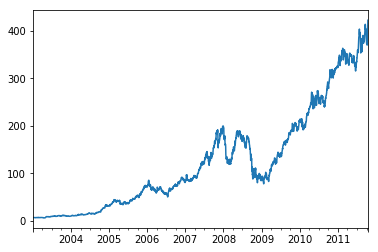

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline
close_px.AAPL.plot()

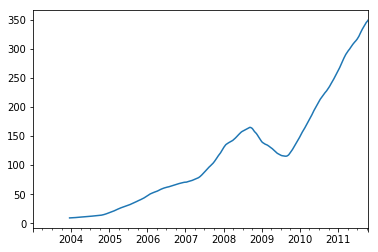

In [55]:
close_px.AAPL.rolling(250).mean().plot()

In [56]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

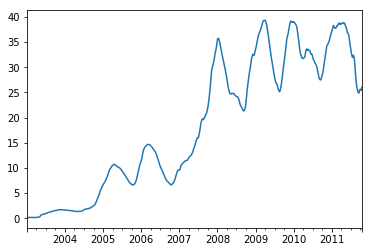

In [57]:
appl_std250.plot()

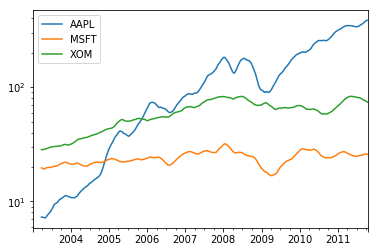

In [59]:
expanding_mean = appl_std250.expanding().mean()
close_px.rolling(60).mean().plot(logy=True)

In [60]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
2003-01-09,7.391667,21.490000,29.273333
2003-01-10,7.387143,21.558571,29.238571
2003-01-13,7.378750,21.633750,29.197500
2003-01-14,7.370000,21.717778,29.194444
2003-01-15,7.355000,21.757000,29.152000


In [61]:
# Exponentially Weighted Functions
# span()
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()

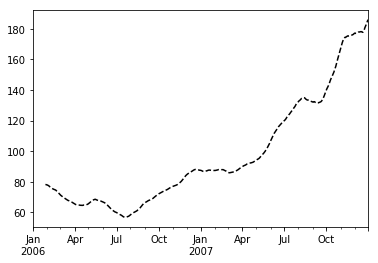

In [69]:
ma60.plot(style='k--', label='Simple MA')

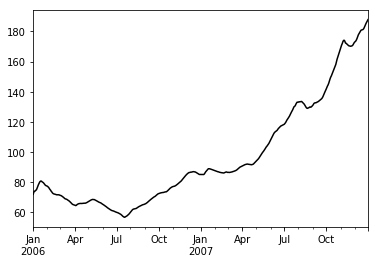

In [70]:
ewma60.plot(style='k-', label='EW MA')

No handles with labels found to put in legend.


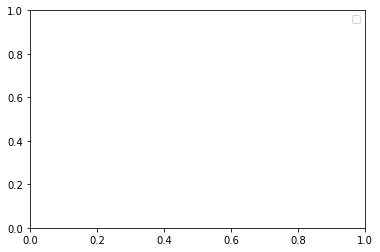

In [71]:
plt.legend()

In [72]:
# Binary Moving Window Functions
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

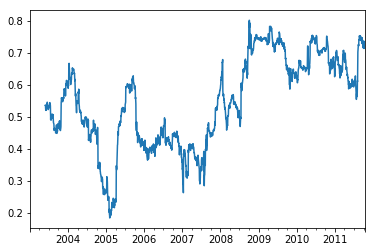

In [73]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()
# rolling_corr rolling() first, then corr?

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  after removing the cwd from sys.path.


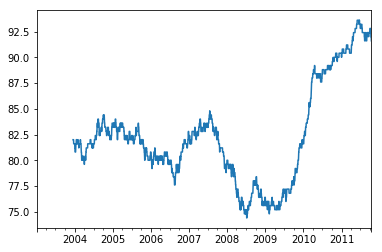

In [74]:
# User-Defined Moving Window Functions
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()

In [ ]:
# 11.8 Conclusion
"""

Time series data calls for different types of analysis and data transformation tools than the other types of data we have explored in previous chapters.
In the following chapters, we will move on to some advanced pandas methods and show how to start using modeling libraries like statsmodels and scikit-learn.
"""